<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание №4

Загрузить датасет на выбор.
Например, датасет о футболистах (для тех, кто интересуется футболом): https://www.kaggle.com/karangadiya/fifa19

Сделать график histogram для данных таблицы. К какому распределению можно отнести эти графики?

Найти в датасете переменную, которую можно предсказать с помощью моделей машинного обучения (например, Overall - рейтинг футболиста в датасете о футболистах).

Эта переменная является target value, или значение, которые мы хотим предсказать. Построить корреляцию данной переменной с другими колонками.  Сделать вывод о том, какие значения коррелируют с данной target value

Найти в датасете классификационные данные (например, в датасете о футболистах, это 
Nationality). Посмотреть количество элементов в каждом классе. Есть ли в данных проблема несбалансированности классов? Что мы можем сделать, чтобы сделать классы сбалансированными? (на эту тему можно почитать статью https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/). Применить методы (если получится) для балансировки данных.

Сгенерировать из классов (например, колонки  Preferred Foot,  Body Type из датасета о футболистах) вектор one-hot encoding. Для чего мы переводим классы в вектора? 

Допустим, мы хотим предсказать зарплату футболиста, основываясь на всех данных в таблице. Какие колонки можно выбрать для линейной регресси? Почему (посмотреть матрицу корреляций)? Написать модель линейной регрессии.

Удалить с помощью регулярного выражения из колонки Name слова с точками (A. Griezmann -> Griezmann). После этого посмотреть, какое имя встречается в таблице чаще всего?

Допустим, мы хотим предсказать International Reputation основываясь на значении Value. Имеют ли данные значения корреляцию? Показать графически и математически. 

Сравнить свой анализ с ноутбуком из каггл. Например, https://www.kaggle.com/nitinchan/fifa19-analysis-viz-recommendation. Что можно добавить к анализу своей работы?

In [116]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

In [77]:
import io
import requests
url="data.csv"
dataset_temp=pd.read_csv(url) 
dataset_temp.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


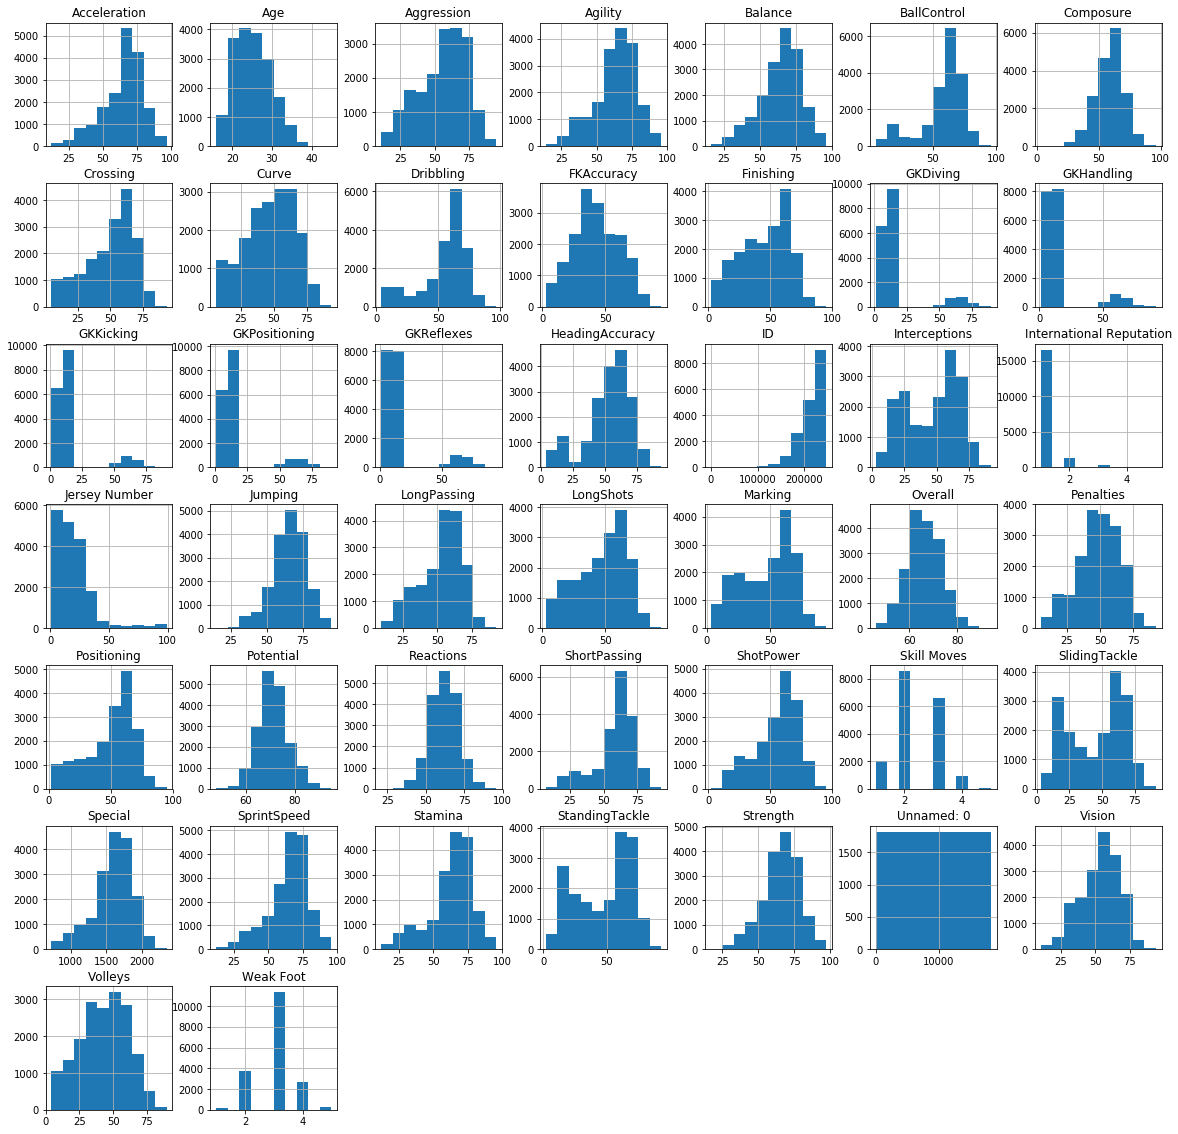

In [4]:
dataset_temp.hist(figsize=(20,20))
plt.show()

Нормальное распределение, Бернули,равномерное

Можно предсказать с помощью моделей машинного обучения (Overall).

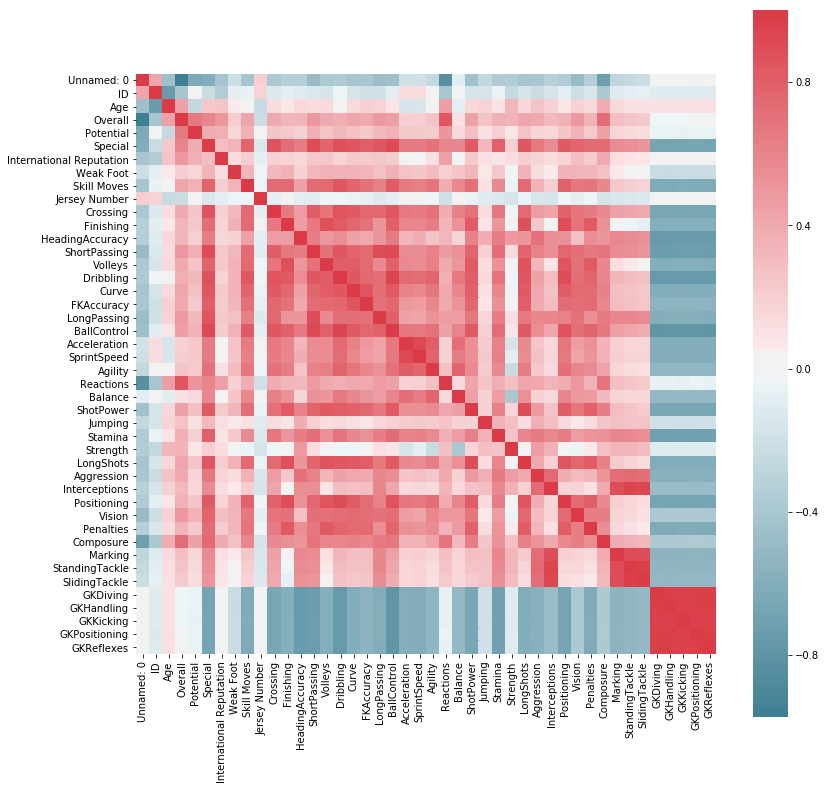

In [78]:
f, ax = plt.subplots(figsize=(13, 13))
corr = dataset_temp.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

Reactions, Composure имеют линейную зависимость с Overall

In [79]:
for i in range(95):
    print(f'Количество значений {i+1}: ', dataset_temp[dataset_temp['Overall']==i+1].shape)


Количество значений 1:  (0, 89)
Количество значений 2:  (0, 89)
Количество значений 3:  (0, 89)
Количество значений 4:  (0, 89)
Количество значений 5:  (0, 89)
Количество значений 6:  (0, 89)
Количество значений 7:  (0, 89)
Количество значений 8:  (0, 89)
Количество значений 9:  (0, 89)
Количество значений 10:  (0, 89)
Количество значений 11:  (0, 89)
Количество значений 12:  (0, 89)
Количество значений 13:  (0, 89)
Количество значений 14:  (0, 89)
Количество значений 15:  (0, 89)
Количество значений 16:  (0, 89)
Количество значений 17:  (0, 89)
Количество значений 18:  (0, 89)
Количество значений 19:  (0, 89)
Количество значений 20:  (0, 89)
Количество значений 21:  (0, 89)
Количество значений 22:  (0, 89)
Количество значений 23:  (0, 89)
Количество значений 24:  (0, 89)
Количество значений 25:  (0, 89)
Количество значений 26:  (0, 89)
Количество значений 27:  (0, 89)
Количество значений 28:  (0, 89)
Количество значений 29:  (0, 89)
Количество значений 30:  (0, 89)
Количество значений

Данные по классам (Overall) не сбалансированны. Можем убрать данные или добавить недостающие данные.

Допустим, мы хотим предсказать зарплату футболиста, основываясь на всех данных в таблице. Какие колонки можно выбрать для линейной регресси? Почему (посмотреть матрицу корреляций)? Написать модель линейной регрессии.

Для линейной регресии можно выбрать колонки(Reactions, Composure)

Допустим, мы хотим предсказать International Reputation основываясь на значении Value. Имеют ли данные значения корреляцию? Показать графически и математически.

In [97]:
import re
def re_word(s):
    return re.sub(r'\D', "", s)
d['Value'] = d['Value'].apply(re_word)
type(d['Value'])
#f = d['Value'].add(dataset_temp['International Reputation'])
#print(f)
#print(type(dataset_temp['International Reputation'][1]))
data_plot = pd.concat([d['Value'] , dataset_temp['International Reputation']], axis=1)
print(data_plot)
#print(d['Value'])
#dat = d['Value'].concat(DataFrame(dataset_temp['International Reputation']))
#dat = dataset_temp['International Reputation']&d['Value'].reindex_like(df)
#print(dat)
#print(d['Value'])
#rez = re.sub(r'\D', "", d['Value']) 
#print(rez)
#complaints[['Complaint Type', 'Borough']]

      Value  International Reputation
0      1105                       5.0
1        77                       5.0
2      1185                       5.0
3        72                       4.0
4       102                       4.0
5        93                       4.0
6        67                       4.0
7        80                       5.0
8        51                       4.0
9        68                       3.0
10       77                       4.0
11      765                       4.0
12       44                       3.0
13       60                       4.0
14       63                       3.0
15       89                       3.0
16      835                       3.0
17       78                       4.0
18       58                       3.0
19      535                       4.0
20      515                       4.0
21       60                       4.0
22       38                       5.0
23      645                       4.0
24       27                       4.0
25       81 

In [100]:
headers = list(data_plot.columns.values)

In [101]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

np_scaled = min_max_scaler.fit_transform(data_plot)
df_norm = pd.DataFrame(np_scaled)
df_norm.head()

C:\Users\Alexandr\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,0,1
0,0.864979,1.0
1,-0.870042,1.0
2,1.000000,1.0
3,-0.878481,0.5
4,-0.827848,0.5


In [103]:
df_norm.columns = headers
df_norm.head(10)

,Value,International Reputation
0,0.864979,1.0
1,-0.870042,1.0
2,1.000000,1.0
3,-0.878481,0.5
4,-0.827848,0.5
5,-0.843038,0.5
6,-0.886920,0.5
7,-0.864979,1.0
8,-0.913924,0.5
9,-0.885232,0.0


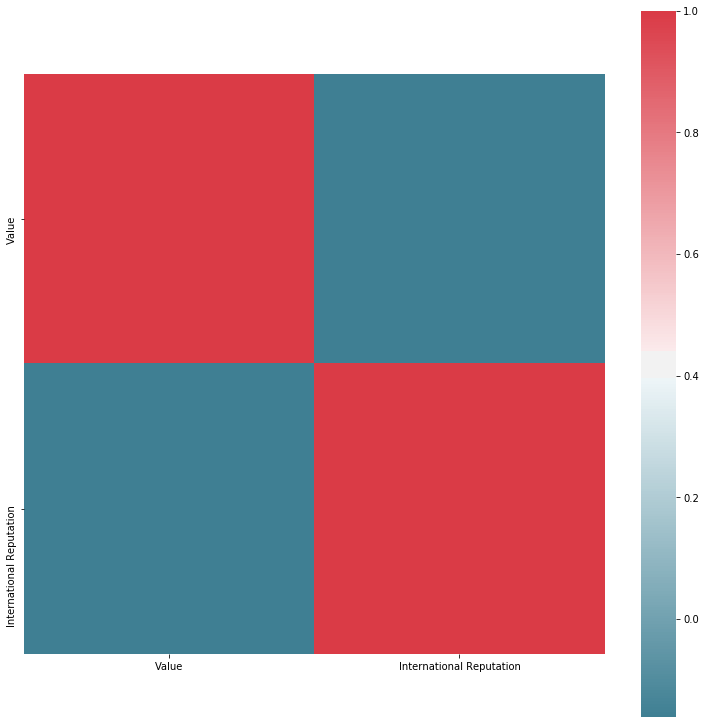

In [104]:
f, ax = plt.subplots(figsize=(13, 13))
corr = df_norm.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

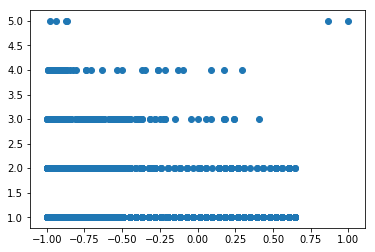

In [106]:
plt.scatter(df_norm['Value'], d['International Reputation'])
plt.show()

Нет корреляции

In [108]:
from scipy.stats import pearsonr
pearsonr(df_norm['Value'], df_norm['International Reputation'])

C:\Users\Alexandr\Anaconda3\lib\site-packages\scipy\stats\stats.py:5256: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0


(nan, 1.0)

Допустим, мы хотим предсказать зарплату футболиста, основываясь на всех данных в таблице. Какие колонки можно выбрать для линейной регресси? Почему (посмотреть матрицу корреляций)? Написать модель линейной регрессии.

Для линейной регресии можно выбрать колонки(Reactions, Composure)

In [109]:
data_plot = pd.concat([d['Value'] , dataset_temp['Reactions'], dataset_temp['Composure']], axis=1)

In [110]:
data_plot

,Value,Reactions,Composure
0,1105,95.0,96.0
1,77,96.0,95.0
2,1185,94.0,94.0
3,72,90.0,68.0
4,102,91.0,88.0
5,93,90.0,91.0
6,67,90.0,84.0
7,80,92.0,85.0
8,51,85.0,82.0
9,68,86.0,70.0


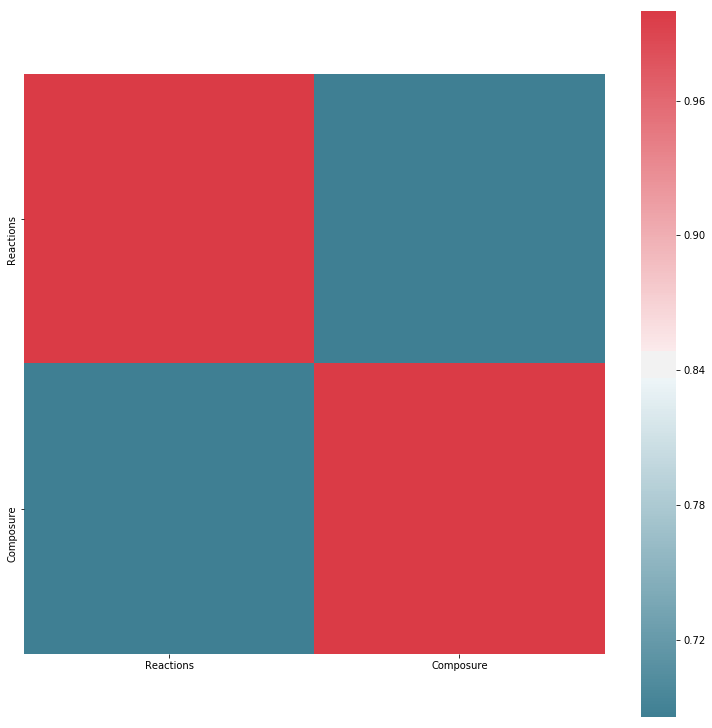

In [111]:
f, ax = plt.subplots(figsize=(13, 13))
corr = data_plot.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

Корреляция большая между параметрами(Reactions, Composure)

In [117]:
from sklearn.linear_model import LinearRegression
lstat = data_plot['Reactions']
medv = data_plot['Composure']
model = LinearRegression()

In [118]:
X_train,X_test,y_train,y_test = train_test_split(lstat,
                                                 medv,
                                                 test_size = 0.3,#%70 train, 30% test
                                                 random_state = 3)
result = model.fit(np.array(X_train).reshape(-1,1), y_train)

print('intercept:', model.intercept_)

print('slope:', model.coef_)

NameError: name 'train_test_split' is not defined

In [119]:
model.score(np.array(X_test).reshape(-1,1), y_test)

NameError: name 'X_test' is not defined